<a href="https://colab.research.google.com/github/arunmozhidevan/Hands-on/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.datasets import load_diabetes

# Tensor Basics

## creating an empty and random tensor

In [ ]:
torch.empty(2,2,2,2)

tensor([[[[6.6446e+23, 3.0634e-41],
          [5.0447e-44, 0.0000e+00]],

         [[       nan, 0.0000e+00],
          [1.3235e-14, 3.6423e-06]]],


        [[[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00]]]])

In [ ]:
torch.rand(2,2) # random 2x2 matrix

tensor([[0.1968, 0.0646],
        [0.8213, 0.6159]])

In [ ]:
torch.zeros(2,2) # zero 2x2 matrix

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
torch.ones(2,2)# 2x2 matrix of ones

tensor([[1., 1.],
        [1., 1.]])

In [ ]:
torch.ones(2,2, dtype=torch.int16)

tensor([[1, 1],
        [1, 1]], dtype=torch.int16)

In [ ]:
torch.ones(2,2, requires_grad=True) # requires_grad - by default this will be true, if it's switched True it requires gradient while calculating 

In [ ]:
torch.tensor([2,2]), type(torch.tensor([2,2]))

(tensor([2, 2]), torch.Tensor)

In [ ]:
x, y = torch.rand(2,2), torch.rand(2,2)

In [ ]:
# slicing
x = torch.rand(6,6)
print(x) # orginal matrix
print(x[1:3,1:3]) # sliced matrix

tensor([[0.2846, 0.9256, 0.7338, 0.9000, 0.9782, 0.8665],
        [0.7942, 0.8119, 0.6378, 0.1246, 0.3377, 0.5770],
        [0.0018, 0.0938, 0.1261, 0.0307, 0.2735, 0.8441],
        [0.0804, 0.9723, 0.1766, 0.2326, 0.4107, 0.4854],
        [0.6609, 0.6049, 0.7470, 0.4324, 0.3718, 0.3989],
        [0.9984, 0.1094, 0.7216, 0.3985, 0.2536, 0.2307]])
tensor([[0.8119, 0.6378],
        [0.0938, 0.1261]])


## slicing the tensor

In [ ]:
x.view(-1,2) # if -1 is specified torch will compute on its own return approriate values based on the matirx size

tensor([[0.2846, 0.9256],
        [0.7338, 0.9000],
        [0.9782, 0.8665],
        [0.7942, 0.8119],
        [0.6378, 0.1246],
        [0.3377, 0.5770],
        [0.0018, 0.0938],
        [0.1261, 0.0307],
        [0.2735, 0.8441],
        [0.0804, 0.9723],
        [0.1766, 0.2326],
        [0.4107, 0.4854],
        [0.6609, 0.6049],
        [0.7470, 0.4324],
        [0.3718, 0.3989],
        [0.9984, 0.1094],
        [0.7216, 0.3985],
        [0.2536, 0.2307]])

In [ ]:
x.view(36) # one dimention array

tensor([0.2846, 0.9256, 0.7338, 0.9000, 0.9782, 0.8665, 0.7942, 0.8119, 0.6378,
        0.1246, 0.3377, 0.5770, 0.0018, 0.0938, 0.1261, 0.0307, 0.2735, 0.8441,
        0.0804, 0.9723, 0.1766, 0.2326, 0.4107, 0.4854, 0.6609, 0.6049, 0.7470,
        0.4324, 0.3718, 0.3989, 0.9984, 0.1094, 0.7216, 0.3985, 0.2536, 0.2307])

In [ ]:
a = torch.ones(5)

## Casting tensor to numpy

In [ ]:
a.numpy(), type(a.numpy()) #this will change into numpy array

(array([1., 1., 1., 1., 1.], dtype=float32), numpy.ndarray)

**Caution:** If both tensor(should be in gpu in case of gpu computaion) and numpy in the cpu then both will share memory.

which means if you change/operate on one variable other variable also change due to share in memory

## Casting numpy to tensor 

In [ ]:
b = a.numpy()
b, type(b)

(array([1., 1., 1., 1., 1.], dtype=float32), numpy.ndarray)

In [ ]:
torch.from_numpy(b) # to cast from array to tensor

tensor([1., 1., 1., 1., 1.])

## GPU processing in torch

In [ ]:
torch.cuda.is_available() # to check the availablity of GPU

True

In [ ]:
device = torch.device('cuda') # to run in cuda
a_ = a.to(device)

In [ ]:
a_ + a_ # this addition process is done in gpu

tensor([2., 2., 2., 2., 2.], device='cuda:0')

## To switch back to cpu processing

In [ ]:
# to run in cpu
a_.to('cpu')

# Autograd

## backward in autograd

In [ ]:
x1 = torch.randn(3, requires_grad=True)
x1 # 3 random tensors

tensor([0.0212, 0.6621, 1.5145], requires_grad=True)

In [ ]:
x2 = x1 + 2
x2

tensor([2.0212, 2.6621, 3.5145], grad_fn=<AddBackward0>)

In [ ]:
x3 = x2*x2*2
x3

tensor([ 8.1706, 14.1731, 24.7031], grad_fn=<MulBackward0>)

In [ ]:
x3 = x3.mean()
x3

tensor(15.6823, grad_fn=<MeanBackward0>)

In [ ]:
x3.backward() # dx3/dx1
# vector jacobian product to get gradients
x1.grad

tensor([2.6950, 3.5494, 4.6860])

<hr/>

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
b = torch.tensor([3., 5., 7.], requires_grad=True) 
q = 3*a**2 - b**2

In [ ]:
ext_grad = torch.tensor([1., 1., 1.]) # if q is not scalar, we should send tensor as backward needs tensor
q.backward(gradient=ext_grad)

In [ ]:
a.grad == 6*a # differenciation of 3*a**2 is 6*a

tensor([True, True, True])

In [ ]:
b.grad == -2*b # differenciation of b**2 is -2*b

tensor([True, True, True])

<hr/>

## Different ways to set requires_grad = False after intialization

### requires_grad_

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
a.requires_grad_(False) # sets gradient requires equals to false

### detach

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
a.detach() # sets gradient requires equals to false

tensor([2., 4., 6.])

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
a.detach() # sets gradient requires equals to false

tensor([2., 4., 6.])

### no_grad

*With no_grad() function*

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
with torch.no_grad(): # sets gradient requires equals to false the newer variable not the orginal
  b = a + 2
  print(b)

tensor([4., 6., 8.])


In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
with torch.no_grad(): # sets gradient requires equals to false the newer variable not the orginal
  print(a)

tensor([2., 4., 6.], requires_grad=True)


"a" still has requires_grad equals to "True"

*Without no_grad() function*

In [ ]:
a = torch.tensor([2., 4., 6.], requires_grad=True)
b = a + 2
print(b) # gradients will be set

tensor([4., 6., 8.], grad_fn=<AddBackward0>)


*Incorrect gradients*

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


*Correct gradients*

In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backpropagation

## perceptron

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
y_pred = x*w
z = y_pred - y
loss = z**2
loss

tensor(1., grad_fn=<PowBackward0>)

In [ ]:
loss.backward()
w.grad

tensor(-2.)

## updating weights

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

for i in range(10):
  print(f'Loss: {w}')
  y_pred = x*w
  z = y_pred - y
  loss = z**2
  loss.backward()
  with torch.no_grad():
    w -= w.grad
    w.grad.zero_()

Loss: 1.0
Loss: 3.0
Loss: 1.0
Loss: 3.0
Loss: 1.0
Loss: 3.0
Loss: 1.0
Loss: 3.0
Loss: 1.0
Loss: 3.0


# Gradient Descent with autograd and backpropagation

## 1. Fully Manual
* Prediction - Manually
* Gradient computation - Manually
* loss computation - Manually
* parameter updates - Manually

In [55]:
# f = w * x
# gradient = 2 * x * (y_pred - y)

X = np.array([1,2,3,4], dtype= np.float32)
Y = np.array([2,4,6,8], dtype= np.float32)
w = 0.0

In [ ]:
#training
learning_rate = 0.01
n_iters = 10

In [53]:
def forward(x):
  return w*x

def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()
  
# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x -y)

In [7]:
f'Predicted before training: f(5) {forward(5):.3f}'

'Predicted before training: f(5) 0.000'

In [56]:
for epoch in range(n_iters):
  # prediciton forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradient = backward pass
  dw = gradient(X, Y, y_pred)

  # update = weight
  w-= learning_rate * dw

  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.3f}')
  
print(f'Predicted after training: f(5) {forward(5):.3f}')

epoch 1: w = 0.160, loss = 16.000
epoch 2: w = 0.307, loss = 13.542
epoch 3: w = 0.443, loss = 11.462
epoch 4: w = 0.567, loss = 9.702
epoch 5: w = 0.682, loss = 8.212
epoch 6: w = 0.787, loss = 6.950
epoch 7: w = 0.884, loss = 5.883
epoch 8: w = 0.974, loss = 4.979
epoch 9: w = 1.056, loss = 4.214
epoch 10: w = 1.131, loss = 3.567
Predicted after training: f(5) 5.656


In [60]:
# early stopping epoch when loss increases
X = np.array([1,2,3,4], dtype= np.float32)
Y = np.array([2,4,6,8], dtype= np.float32)
w = 0.0

prev_loss = 0
epoch = 0
while True:
  epoch +=1
  # prediciton forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradient = backward pass
  dw = gradient(X, Y, y_pred)

  # update = weight
  w-= learning_rate * dw


  print(f'epoch {epoch}: w = {w:.3f}, loss = {l:.3f}')
  
  if epoch == 1:
    prev_loss = l
    continue
  if round(prev_loss,3) <= round(l,3):
    break
  prev_loss = l

print(f'Predicted after training: f(5) {forward(5):.3f}')

epoch 1: w = 1.200, loss = 30.000
epoch 2: w = 1.680, loss = 4.800
epoch 3: w = 1.872, loss = 0.768
epoch 4: w = 1.949, loss = 0.123
epoch 5: w = 1.980, loss = 0.020
epoch 6: w = 1.992, loss = 0.003
epoch 7: w = 1.997, loss = 0.001
epoch 8: w = 1.999, loss = 0.000
epoch 9: w = 1.999, loss = 0.000
Predicted after training: f(5) 9.997


## 2. Using autograd for Gradient computation
* Prediction - Manually
* Gradient computation - autograd
* loss computation - Manually
* parameter updates - Manually

In [66]:
w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)
n_iters = 100

In [67]:
for epoch in range(n_iters):
  # prediciton = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradient = backward pass
  l.backward() # dl/dw

  # update = weight
  with torch.no_grad():
    w-= learning_rate * w.grad

    # zero gradients
  w.grad.zero_()

  if epoch % 5 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.3f}')
  
print(f'Predicted after training: f(5) {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
Predicted after training: f(5) 8.031


# Training Pipeline: Model, Loss, and Optimizer

## 3. PyTorch Loss & Optimer for loss computation and parameter updates
* Prediction - Manually
* Gradient computation - autograd
* loss computation - PyTorch Loss
* parameter updates - PyTorch Optimer

*Steps:*
1. design mode (input, output size, forward pass)
2. construct loss and optimizer
3. training loop
  - forward pass: compute prediction
  - bacward pass: gradients
  - update weights

In [70]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

In [69]:
w = torch.tensor(0.0, dtype= torch.float32, requires_grad= True)

for epoch in range(n_iters):
  
  y_pred = forward(X) # prediciton = forward pass

  l = loss(Y, y_pred) # loss

  l.backward() # gradient = backward pass, dl/dw

  optimizer.step() # update = weight

  optimizer.zero_grad() # zero gradients

  if epoch % 5 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.3f}')
  
print(f'Predicted after training: f(5) {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.000
epoch 2: w = 0.555, loss = 21.675
epoch 3: w = 0.772, loss = 15.660
epoch 4: w = 0.956, loss = 11.314
epoch 5: w = 1.113, loss = 8.175
epoch 6: w = 1.246, loss = 5.906
epoch 7: w = 1.359, loss = 4.267
epoch 8: w = 1.455, loss = 3.083
epoch 9: w = 1.537, loss = 2.228
epoch 10: w = 1.606, loss = 1.609
Predicted after training: f(5) 8.031


## 4. Fully PyTorch
* Prediction - PyTorch Model
* Gradient computation - autograd
* loss computation - PyTorch Loss
* parameter updates - PyTorch Optimer

In [116]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features

In [101]:
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [102]:
X_test = torch.tensor([5], dtype= torch.float32)

In [93]:
f'Predicted after training: f(5) {model(X_test).item():.3f}'

'Predicted after training: f(5) 1.394'

In [88]:
for epoch in range(n_iters):
  y_pred = model(X) # prediciton = forward pass
  l = loss(Y, y_pred) # loss
  l.backward() # gradient = backward pass, dl/dw 
  optimizer.step() # update = weight
  optimizer.zero_grad() # zero gradients

  if epoch % 5 ==0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.3f}')
  
print(f'Predicted after training: f(5) {model(X_test).item():.3f}')

epoch 1: w = 0.070, loss = 29.788
epoch 2: w = 0.319, loss = 20.757
epoch 3: w = 0.527, loss = 14.489
epoch 4: w = 0.700, loss = 10.140
epoch 5: w = 0.844, loss = 7.122
epoch 6: w = 0.965, loss = 5.027
epoch 7: w = 1.065, loss = 3.573
epoch 8: w = 1.149, loss = 2.563
epoch 9: w = 1.219, loss = 1.862
epoch 10: w = 1.278, loss = 1.375
Predicted after training: f(5) 7.574


# LinearRegression

## Custom regression model

In [272]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    return self.lin(x)

In [132]:
model = LinearRegression(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [133]:
for epoch in range(n_iters):
  y_pred = model(X) # prediciton = forward pass
  l = loss(Y, y_pred) # loss
  l.backward() # gradient = backward pass, dl/dw 
  optimizer.step() # update = weight
  optimizer.zero_grad() # zero gradients

  if epoch % 5 ==0:
    [w, b] = model.parameters()
    print(f'epoch {epoch//5+1}: w = {w[0][0].item():.3f}, loss = {l:.3f}')
  
print(f'Predicted after training: f(5) {model(X_test).item():.3f}')

epoch 1: w = -0.092, loss = 36.795
epoch 2: w = 0.902, loss = 6.149
epoch 3: w = 1.305, loss = 1.213
epoch 4: w = 1.470, loss = 0.413
epoch 5: w = 1.540, loss = 0.278
epoch 6: w = 1.572, loss = 0.250
epoch 7: w = 1.588, loss = 0.239
epoch 8: w = 1.598, loss = 0.231
epoch 9: w = 1.606, loss = 0.225
epoch 10: w = 1.612, loss = 0.218
epoch 11: w = 1.618, loss = 0.211
epoch 12: w = 1.624, loss = 0.205
epoch 13: w = 1.630, loss = 0.199
epoch 14: w = 1.635, loss = 0.193
epoch 15: w = 1.641, loss = 0.188
epoch 16: w = 1.646, loss = 0.182
epoch 17: w = 1.651, loss = 0.177
epoch 18: w = 1.656, loss = 0.171
epoch 19: w = 1.662, loss = 0.166
epoch 20: w = 1.667, loss = 0.161
Predicted after training: f(5) 9.321


## Regression model on a dataset

*Steps:*
1. design mode (input, output size, forward pass)
2. construct loss and optimizer
3. training loop
  - forward pass: compute prediction
  - bacward pass: gradients
  - update weights

In [266]:
from sklearn.datasets import make_regression
X_numpy, y_numpy = make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X, Y = torch.tensor(X_numpy, dtype=torch.float32), torch.tensor(y_numpy, dtype=torch.float32).reshape(-1,1)
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features
learning_rate = 0.001

In [267]:
model = nn.Linear(input_size, 1) # linear model takes, X feature size and y feature size
loss = nn.MSELoss()  # MSE loss function takes y_prediction and y
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stohastic gradient de

In [268]:
no_epochs = 10000
for epoch in range(no_epochs):
  y_pred = model(X) # forward pass
  l = loss(y_pred, Y) # loss
  l.backward() # backward pass
  optimizer.step() # update = weight
  optimizer.zero_grad() # zero gradients

  print_steps = no_epochs // 10
  if epoch % print_steps == 0:
    [w, b] = model.parameters()
    print(f'epoch: {epoch//print_steps+1}, loss = {l.item():.3f}')

epoch: 1, loss = 5837.981
epoch: 2, loss = 564.801
epoch: 3, loss = 342.841
epoch: 4, loss = 333.031
epoch: 5, loss = 332.589
epoch: 6, loss = 332.569
epoch: 7, loss = 332.568
epoch: 8, loss = 332.568
epoch: 9, loss = 332.568
epoch: 10, loss = 332.568


## Plotting regression line

In [226]:
import matplotlib.pyplot as plt

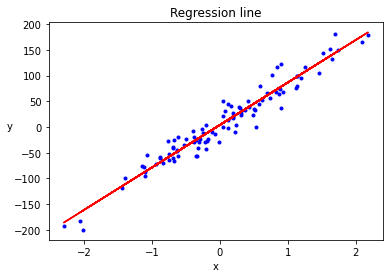

In [271]:
plt.plot(X_numpy, y_numpy, 'b.')
plt.plot(X_numpy,model(X).detach().numpy(),'r')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.title('Regression line')
plt.show()

In [230]:
# data = load_diabetes()
# X, Y = torch.tensor(data.data, dtype=torch.float32), torch.tensor(data.target, dtype=torch.float32).reshape(-1,1)
# n_samples, n_features = X.shape
# input_size = n_features
# output_size = n_features
# learning_rate = 0.01

# LogiticRegression

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

## loading load_breast_cancer dataset

In [25]:
cancer_data = load_breast_cancer()
X, y  = cancer_data.data, cancer_data.target
n_samples, n_features = X.shape
input_size = n_features
output_size = n_features
learning_rate = 0.01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## scaling the X_train and X_test

In [22]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## casting numpy into tensor

In [23]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1,1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1,1)

## custom logistic regression model

In [24]:
class LogiticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(LogiticRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(n_input_features, 1)
  
  def forward(self, x):
    y_pred = torch.sigmoid(self.lin(x))
    return y_pred

## Loss and optimizer

In [27]:
model = LogiticRegression(n_features)
loss = nn.BCELoss()  # MSE loss function takes y_prediction and y
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # stohastic gradient descent

## training the model

In [28]:
no_epochs = 100
for epoch in range(no_epochs):
  y_pred = model(X_train_tensor) # forward pass
  l = loss(y_pred, y_train_tensor) # loss
  l.backward() # backward pass
  optimizer.step() # update = weight
  optimizer.zero_grad() # zero gradients

  print_steps = no_epochs // 10
  if epoch % print_steps == 0:
    [w, b] = model.parameters()
    print(f'epoch: {epoch//print_steps+1}, loss = {l.item():.3f}')

epoch: 1, loss = 0.973
epoch: 2, loss = 0.703
epoch: 3, loss = 0.554
epoch: 4, loss = 0.466
epoch: 5, loss = 0.409
epoch: 6, loss = 0.368
epoch: 7, loss = 0.337
epoch: 8, loss = 0.314
epoch: 9, loss = 0.295
epoch: 10, loss = 0.279


## testing the model

In [33]:
with torch.no_grad():
  pred = model(X_test_tensor)
  y_pred = pred.round()
  acc = y_pred.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])
  print(f'accuarcy: {acc:.3f}')

accuarcy: 0.965


# Batch Training - Dataset and DataLoader  

In [35]:
from torch.utils.data import Dataset, DataLoader
import math
import torchvision

In [36]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

--2022-04-02 15:41:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0s      

2022-04-02 15:41:30 (76.4 MB/s) - ‘wine.data’ saved [10782/10782]



In [209]:
class winedataset(Dataset):
  

  def __init__(self):
    data = np.loadtxt('/content/wine.data', delimiter=',', dtype=np.float32) # data loading
    self.x = torch.from_numpy(data[:,1:]) # explanatory variables
    self.y = torch.from_numpy(data[:,0]).reshape(-1,1) # first column contains the target variables
    self.n_samples = data.shape[0] # no. of samples


  def __getitem__(self, index):
    return self.x[index], self.y[index] # dataset


  def __len__(self):
    return self.n_samples # len(dataset)

In [211]:
batch_size = 4
dataset = winedataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, num_workers=2)

In [90]:
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data

In [97]:
num_epochs = 2
total_samples = len(dataset)
n_iterations = int(np.ceil((total_samples/batch_size)))

In [125]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if (i+1) % 5 ==0:
      print(f'epoch: {epoch+1}/{num_epochs}, step: {i+1: =2}/{n_iterations}, input: {inputs.shape}')

epoch: 1/2, step:  5/45, input: torch.Size([4, 13])
epoch: 1/2, step: 10/45, input: torch.Size([4, 13])
epoch: 1/2, step: 15/45, input: torch.Size([4, 13])
epoch: 1/2, step: 20/45, input: torch.Size([4, 13])
epoch: 1/2, step: 25/45, input: torch.Size([4, 13])
epoch: 1/2, step: 30/45, input: torch.Size([4, 13])
epoch: 1/2, step: 35/45, input: torch.Size([4, 13])
epoch: 1/2, step: 40/45, input: torch.Size([4, 13])
epoch: 1/2, step: 45/45, input: torch.Size([2, 13])
epoch: 2/2, step:  5/45, input: torch.Size([4, 13])
epoch: 2/2, step: 10/45, input: torch.Size([4, 13])
epoch: 2/2, step: 15/45, input: torch.Size([4, 13])
epoch: 2/2, step: 20/45, input: torch.Size([4, 13])
epoch: 2/2, step: 25/45, input: torch.Size([4, 13])
epoch: 2/2, step: 30/45, input: torch.Size([4, 13])
epoch: 2/2, step: 35/45, input: torch.Size([4, 13])
epoch: 2/2, step: 40/45, input: torch.Size([4, 13])
epoch: 2/2, step: 45/45, input: torch.Size([2, 13])


In [215]:
x, y = dataset[0]
x, y = np.array(x), np.array(y)

In [216]:
ToTensor([x, y])

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]), tensor([1.]))

# Dataset Transforms

In [251]:
class winedataset(Dataset):
  

  def __init__(self, transformer = None):
    data = np.loadtxt('/content/wine.data', delimiter=',', dtype=np.float32) # data loading
    
    # here the inputs are of numpy
    self.x = np.array(data[:,1:]) # explanatory variables
    self.y = np.array(data[:,[0]]) # first column contains the target variables
    self.n_samples = data.shape[0] # no. of samples

    self.transformer = transformer

  def __getitem__(self, index):
    samples = self.x[index], self.y[index] # dataset\

    if self.transformer:
      samples = self.transformer(samples)

    return samples

  def __len__(self):
    return self.n_samples # len(dataset)

In [260]:
class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

## Without Tensor Transform

In [254]:
dataset = winedataset()
dataset[0] # the values are of numpy not tensor

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03], dtype=float32), array([1.], dtype=float32))

## With Tensor Transform

In [253]:
dataset = winedataset(transformer=ToTensor)
dataset[0] # the values are of tensor not numpy

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]), tensor([1.]))

## With Tensor and Multiplication Transform

In [262]:
class Multransform:

  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets

In [264]:
composed = torchvision.transforms.Compose([ToTensor(), Multransform(4)])
dataset = winedataset(transformer=composed)
dataset[0]

(tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
         1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
         4.2600e+03]), tensor([1.]))

# Softmax and Cross Entropy

In [265]:
y = np.random.choice(10,4)

In [266]:
y

array([6, 1, 9, 0])

In [268]:
exp_y = [np.exp(i) for i in y]
exp_y_sum = sum(exp_y)

In [278]:
exp_y

[403.4287934927351, 2.718281828459045, 8103.083927575384, 1.0]

In [269]:
[i/exp_y_sum for i in exp_y]

[0.04740515191131972,
 0.0003194134010620674,
 0.9521579290641328,
 0.00011750562348538315]

In [277]:
[i/sum(y) for i in y]

[0.375, 0.0625, 0.5625, 0.0]

# Notes

* if a function ends **_** , that basically will modify our variable inplace

* **grad.zero_()** for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes.

* **epoch** is 1 forward and backward pass of all training samples

* **batch_size** is number of training samples in one forward and backward pass

* **no. of iterations** is no. passes, each pass using [batch_size] no. of samples <br> e.g.<br>*samples = 100*<br>*batch_size* = 20<br>samples/batch_size = 5 *iterations* for *1 epoch*

# Reference

PyTorch Youtube Tutorials<br>
https://www.youtube.com/watch?v=EMXfZB8FVUA&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=1